# Exploratory Data Analysis - Cardiotocographic Dataset

This notebook contains a comprehensive exploratory analysis of the Cardiotocographic dataset to understand fetal heart rate patterns and their relationship with various clinical parameters.


## 1. Data Cleaning and Preparation


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
df = pd.read_csv('Cardiotocographic.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")
df.head()


Dataset shape: (2126, 14)

Column names: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [3]:
print("Data types:")
print(df.dtypes)
print("\n" + "="*50)
print("\nDataset info:")
df.info()


Data types:
LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-n

In [4]:
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found")
print(f"\nTotal missing values: {df.isnull().sum().sum()}")


Missing values per column:
LB          21
AC          20
DS          21
DP          21
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

Total missing values: 167


In [5]:
print("NSP value counts:")
print(df['NSP'].value_counts().sort_index())
print(f"\nUnique NSP values: {sorted(df['NSP'].unique())}")

nsp_issues = df[~df['NSP'].isin([1, 2, 3])]
if len(nsp_issues) > 0:
    print(f"\nFound {len(nsp_issues)} rows with unusual NSP values:")
    print(nsp_issues[['NSP']].head(10))


NSP value counts:
NSP
-1.025988    1
-1.000000    5
 0.967075    1
 0.969447    1
 0.972305    1
            ..
 3.015185    1
 3.019152    1
 3.020038    1
 3.034545    1
 5.000000    4
Name: count, Length: 111, dtype: int64

Unique NSP values: [np.float64(-1.025988003), np.float64(-1.0), np.float64(0.9670754980678286), np.float64(0.9694468894020888), np.float64(0.9723045763887092), np.float64(0.9754403771103166), np.float64(0.9781736816739484), np.float64(0.97927954), np.float64(0.979737977250412), np.float64(0.9812263853035132), np.float64(0.981459591), np.float64(0.9834202772977528), np.float64(0.9847920503949026), np.float64(0.984833884362688), np.float64(0.9874981331247916), np.float64(0.9883928504062728), np.float64(0.9883989770739442), np.float64(0.9890056676785192), np.float64(0.9892569738656792), np.float64(0.9895254226574304), np.float64(0.9898621604640492), np.float64(0.991066133193022), np.float64(0.991200126983224), np.float64(0.99167495011883), np.float64(0.992234188), n

In [6]:
df['NSP'] = pd.to_numeric(df['NSP'], errors='coerce')
df = df[df['NSP'].notna()].copy()
df['NSP'] = df['NSP'].round().astype(int)
df = df[df['NSP'].isin([1, 2, 3])].copy()

print(f"Dataset shape after cleaning: {df.shape}")
print(f"\nNSP distribution after cleaning:")
print(df['NSP'].value_counts().sort_index())


Dataset shape after cleaning: (2095, 14)

NSP distribution after cleaning:
NSP
1    1630
2     293
3     172
Name: count, dtype: int64


In [7]:
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"\nRemoving {duplicates} duplicate rows...")
    df = df.drop_duplicates().copy()
    print(f"Dataset shape after removing duplicates: {df.shape}")


Number of duplicate rows: 2

Removing 2 duplicate rows...
Dataset shape after removing duplicates: (2093, 14)


In [8]:
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Numerical columns: {numerical_cols}")

outlier_summary = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)
    
print("\nOutlier counts (using IQR method):")
for col, count in sorted(outlier_summary.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"{col}: {count} outliers")


Numerical columns: ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV', 'MLTV', 'Width', 'Tendency', 'NSP']

Outlier counts (using IQR method):
NSP: 465 outliers
FM: 340 outliers
ALTV: 317 outliers
DP: 283 outliers
DL: 122 outliers


## 2. Statistical Summary


In [9]:
desc_stats = df.describe()
desc_stats


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000,2093.000000
mean,133.349391,0.003193,0.009974,0.004385,0.001899,0.000003,0.000175,47.042443,1.359492,10.376219,8.311920,70.323519,0.316283,1.304348
std,11.286963,0.004326,0.068052,0.003348,0.003328,0.000142,0.000840,18.872061,1.171201,21.328737,7.674799,42.936220,0.646494,0.613398
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,1.000000
25%,126.000000,0.000000,0.000000,0.001821,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001616,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.041769,0.005624,0.002554,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,3.000000


In [10]:
stats_summary = pd.DataFrame({
    'Mean': df[numerical_cols].mean(),
    'Median': df[numerical_cols].median(),
    'Std Dev': df[numerical_cols].std(),
    'Min': df[numerical_cols].min(),
    'Max': df[numerical_cols].max(),
    'Q1': df[numerical_cols].quantile(0.25),
    'Q3': df[numerical_cols].quantile(0.75),
    'IQR': df[numerical_cols].quantile(0.75) - df[numerical_cols].quantile(0.25)
})
stats_summary = stats_summary.round(3)
stats_summary


,Mean,Median,Std Dev,Min,Max,Q1,Q3,IQR
LB,133.349,133.000,11.287,51.842,214.000,126.000,140.042,14.042
AC,0.003,0.002,0.004,-0.019,0.039,0.000,0.006,0.006
FM,0.010,0.000,0.068,-0.481,0.961,0.000,0.003,0.003
UC,0.004,0.004,0.003,-0.015,0.030,0.002,0.007,0.005
DL,0.002,0.000,0.003,-0.015,0.031,0.000,0.003,0.003
DS,0.000,0.000,0.000,-0.001,0.003,0.000,0.000,0.000
DP,0.000,0.000,0.001,-0.005,0.011,0.000,0.000,0.000
ASTV,47.042,49.000,18.872,-63.000,162.000,32.000,61.000,29.000
MSTV,1.359,1.200,1.171,-6.600,13.800,0.700,1.700,1.000
ALTV,10.376,0.000,21.329,-91.000,182.000,0.000,11.000,11.000


In [11]:
print("Key Statistical Findings:")
print("="*60)
print(f"\n1. Baseline FHR (LB): Mean = {df['LB'].mean():.2f}, Median = {df['LB'].median():.2f}")
print(f"   Range: {df['LB'].min():.2f} to {df['LB'].max():.2f} bpm")
print(f"\n2. Short Term Variability (MSTV): Mean = {df['MSTV'].mean():.2f}, Std = {df['MSTV'].std():.2f}")
print(f"\n3. Long Term Variability (MLTV): Mean = {df['MLTV'].mean():.2f}, Std = {df['MLTV'].std():.2f}")
print(f"\n4. NSP Distribution:")
for nsp_val, count in df['NSP'].value_counts().sort_index().items():
    pct = (count / len(df)) * 100
    label = {1: "Normal", 2: "Suspect", 3: "Pathological"}.get(nsp_val, "Unknown")
    print(f"   {label} (NSP={nsp_val}): {count} ({pct:.1f}%)")


Key Statistical Findings:

1. Baseline FHR (LB): Mean = 133.35, Median = 133.00
   Range: 51.84 to 214.00 bpm

2. Short Term Variability (MSTV): Mean = 1.36, Std = 1.17

3. Long Term Variability (MLTV): Mean = 8.31, Std = 7.67

4. NSP Distribution:
   Normal (NSP=1): 1628 (77.8%)
   Suspect (NSP=2): 293 (14.0%)
   Pathological (NSP=3): 172 (8.2%)


## 3. Data Visualization


### 3.1 Distribution of Key Numerical Variables


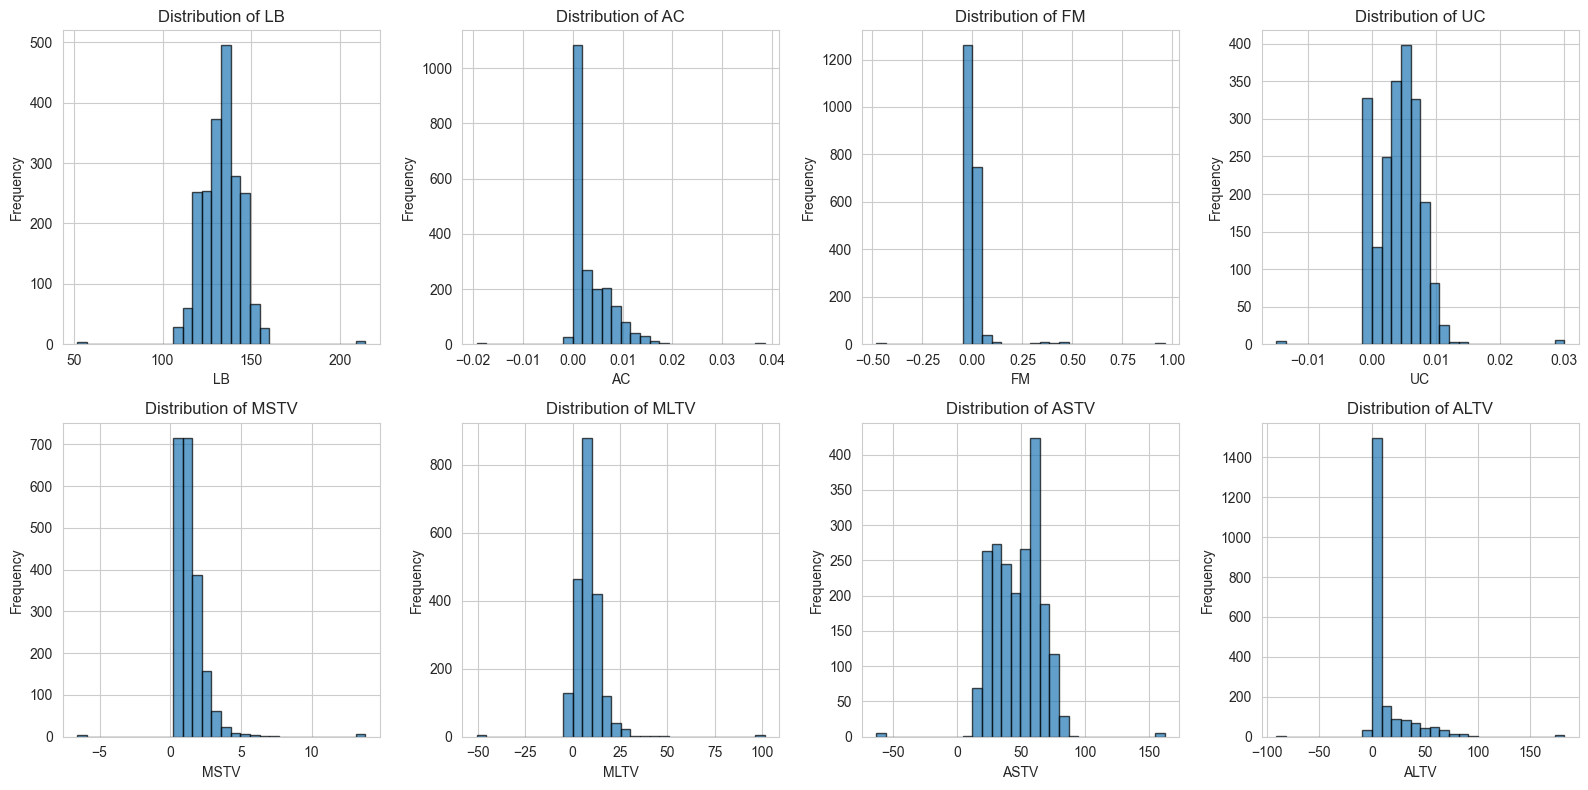

In [12]:
key_vars = ['LB', 'AC', 'FM', 'UC', 'MSTV', 'MLTV', 'ASTV', 'ALTV']
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, var in enumerate(key_vars):
    axes[i].hist(df[var], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### 3.2 Boxplots for Outlier Detection


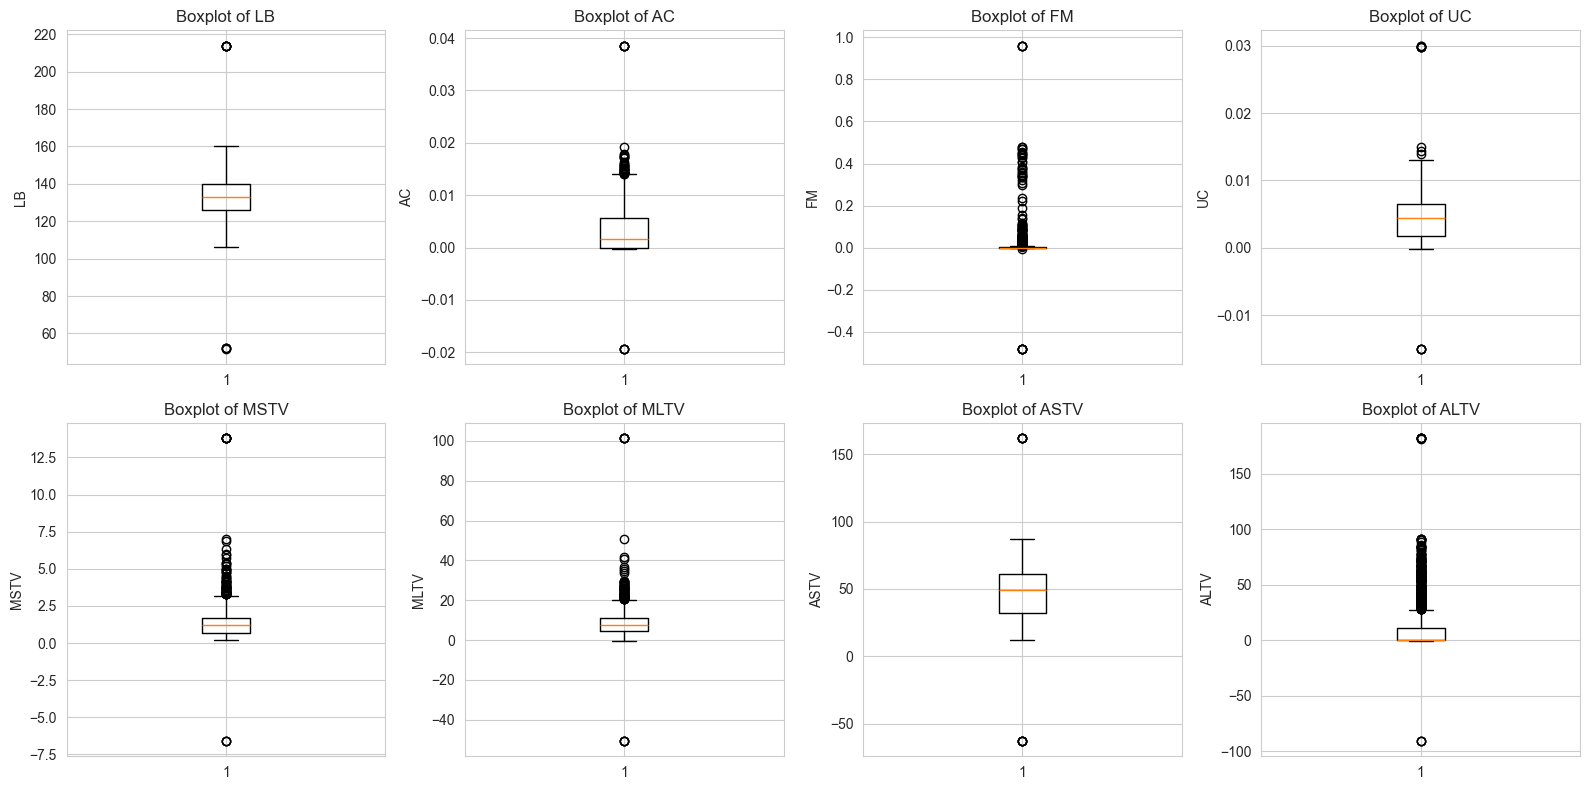

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, var in enumerate(key_vars):
    axes[i].boxplot(df[var], vert=True)
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


### 3.3 Categorical Variable: NSP Distribution


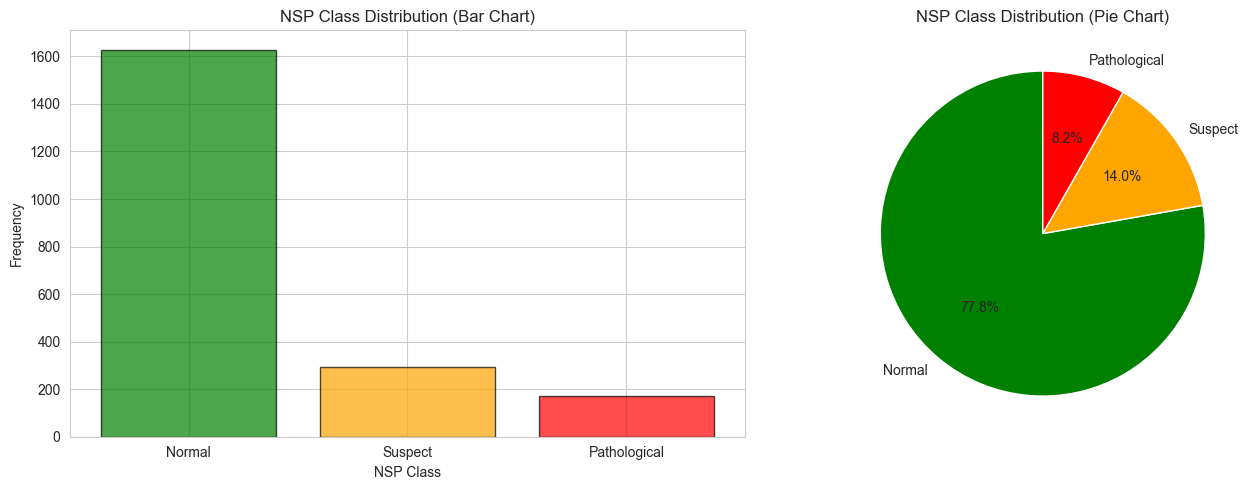

In [14]:
nsp_counts = df['NSP'].value_counts().sort_index()
nsp_labels = {1: 'Normal', 2: 'Suspect', 3: 'Pathological'}
labels = [nsp_labels.get(x, f'NSP={x}') for x in nsp_counts.index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.bar(labels, nsp_counts.values, color=['green', 'orange', 'red'], alpha=0.7, edgecolor='black')
ax1.set_title('NSP Class Distribution (Bar Chart)')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('NSP Class')

ax2.pie(nsp_counts.values, labels=labels, autopct='%1.1f%%', startangle=90, 
        colors=['green', 'orange', 'red'])
ax2.set_title('NSP Class Distribution (Pie Chart)')

plt.tight_layout()
plt.show()


### 3.4 Correlation Heatmap


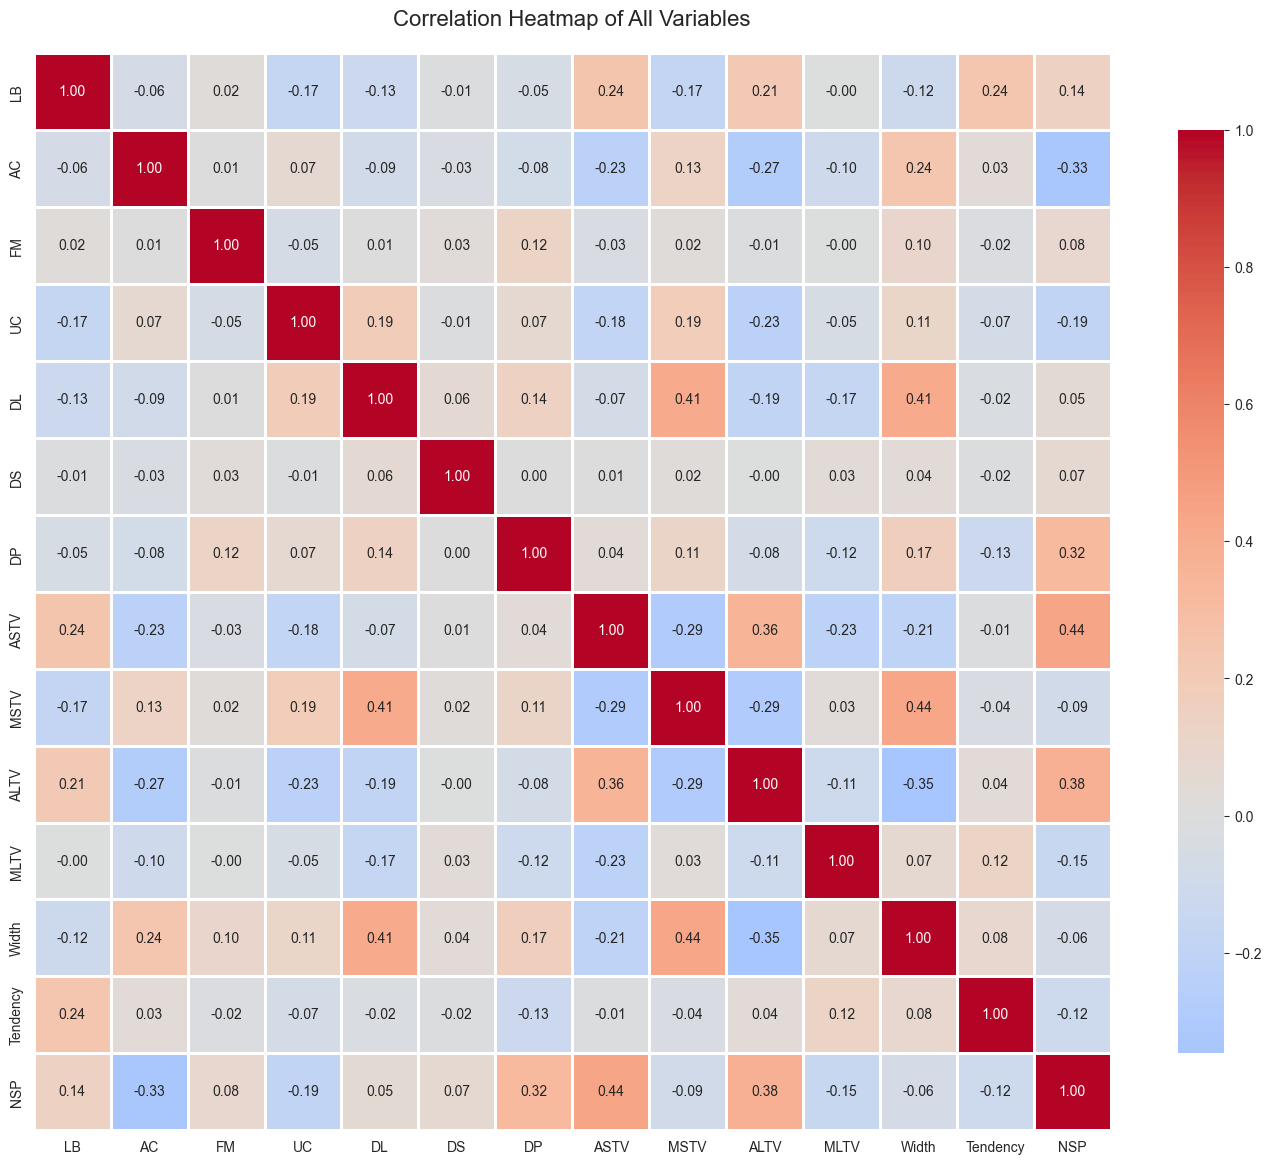

In [15]:
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap of All Variables', fontsize=16, pad=20)
plt.tight_layout()
plt.show()


### 3.5 Scatter Plots: Key Variable Relationships


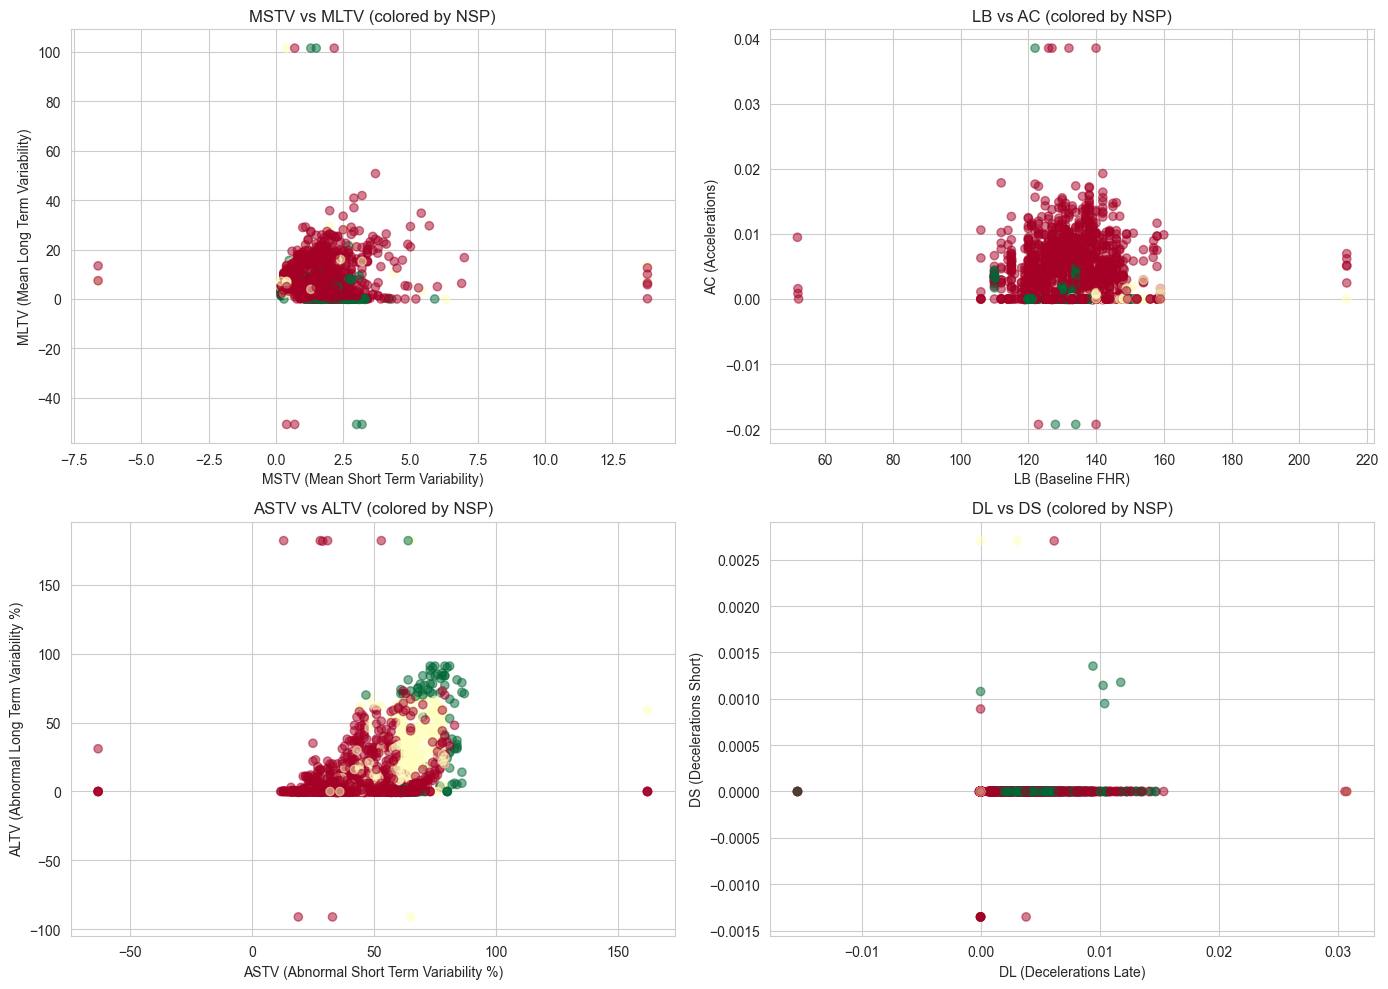

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df['MSTV'], df['MLTV'], alpha=0.5, c=df['NSP'], cmap='RdYlGn')
axes[0, 0].set_xlabel('MSTV (Mean Short Term Variability)')
axes[0, 0].set_ylabel('MLTV (Mean Long Term Variability)')
axes[0, 0].set_title('MSTV vs MLTV (colored by NSP)')

axes[0, 1].scatter(df['LB'], df['AC'], alpha=0.5, c=df['NSP'], cmap='RdYlGn')
axes[0, 1].set_xlabel('LB (Baseline FHR)')
axes[0, 1].set_ylabel('AC (Accelerations)')
axes[0, 1].set_title('LB vs AC (colored by NSP)')

axes[1, 0].scatter(df['ASTV'], df['ALTV'], alpha=0.5, c=df['NSP'], cmap='RdYlGn')
axes[1, 0].set_xlabel('ASTV (Abnormal Short Term Variability %)')
axes[1, 0].set_ylabel('ALTV (Abnormal Long Term Variability %)')
axes[1, 0].set_title('ASTV vs ALTV (colored by NSP)')

axes[1, 1].scatter(df['DL'], df['DS'], alpha=0.5, c=df['NSP'], cmap='RdYlGn')
axes[1, 1].set_xlabel('DL (Decelerations Late)')
axes[1, 1].set_ylabel('DS (Decelerations Short)')
axes[1, 1].set_title('DL vs DS (colored by NSP)')

plt.tight_layout()
plt.show()


### 3.6 Pair Plot for Selected Variables


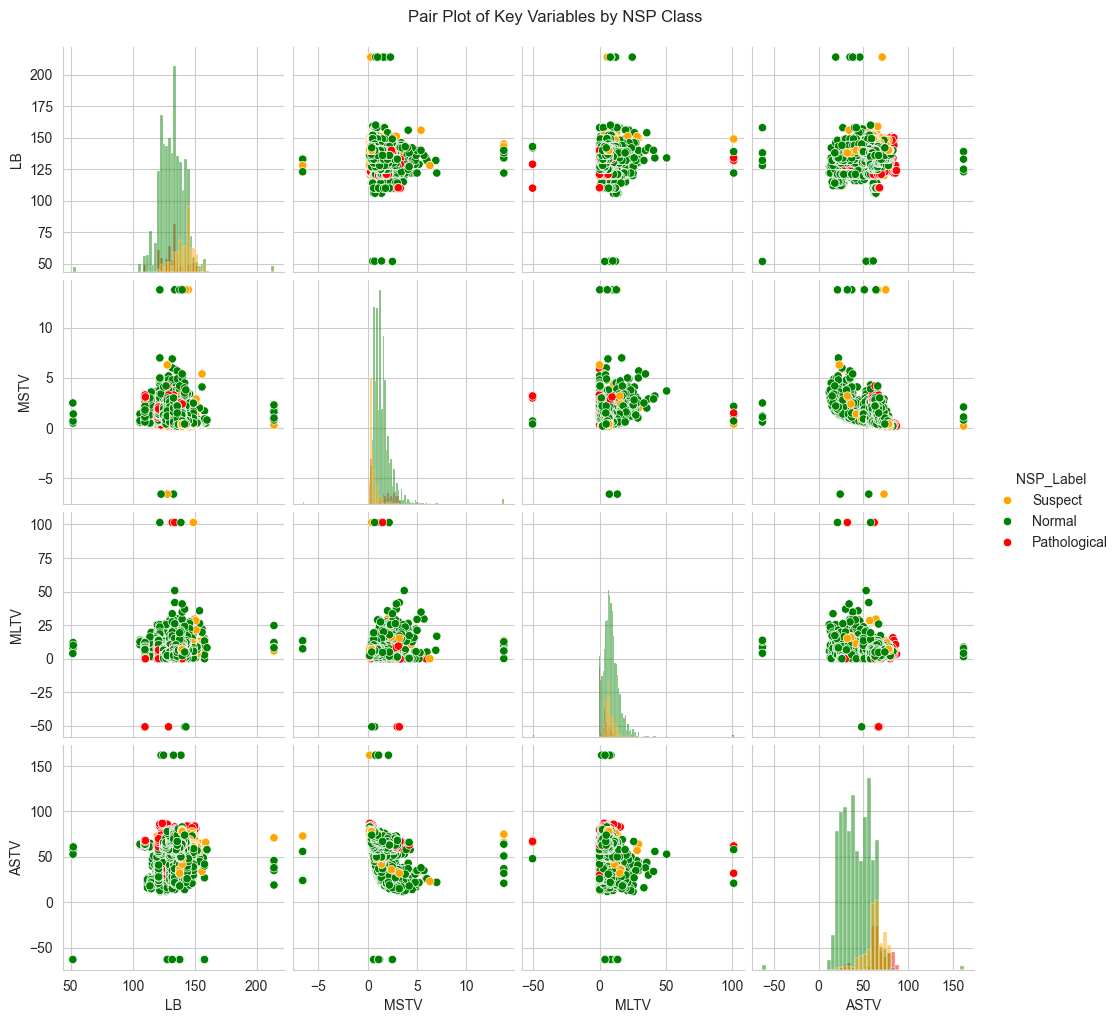

In [17]:
selected_vars = ['LB', 'MSTV', 'MLTV', 'ASTV', 'NSP']
pair_df = df[selected_vars].copy()
pair_df['NSP_Label'] = pair_df['NSP'].map({1: 'Normal', 2: 'Suspect', 3: 'Pathological'})

sns.pairplot(pair_df.drop('NSP', axis=1), hue='NSP_Label', diag_kind='hist', 
             palette={'Normal': 'green', 'Suspect': 'orange', 'Pathological': 'red'})
plt.suptitle('Pair Plot of Key Variables by NSP Class', y=1.02)
plt.show()


### 3.7 Violin Plots: Variable Distributions by NSP Class


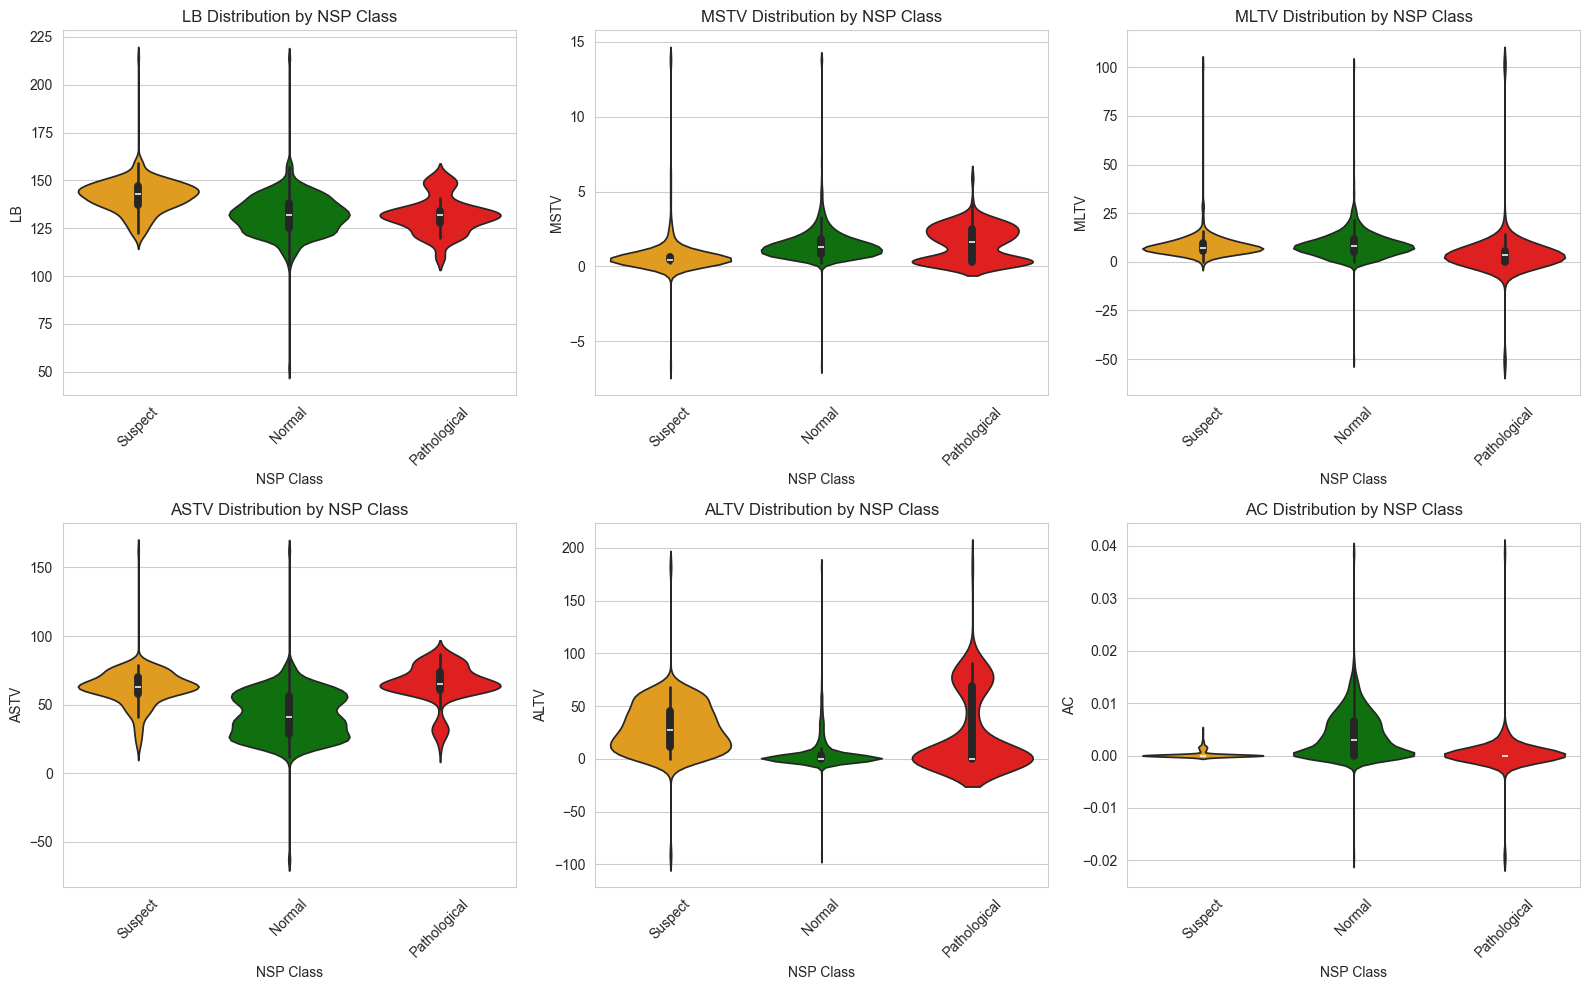

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

violin_vars = ['LB', 'MSTV', 'MLTV', 'ASTV', 'ALTV', 'AC']
for i, var in enumerate(violin_vars):
    df_violin = df[[var, 'NSP']].copy()
    df_violin['NSP_Label'] = df_violin['NSP'].map({1: 'Normal', 2: 'Suspect', 3: 'Pathological'})
    
    sns.violinplot(data=df_violin, x='NSP_Label', y=var, ax=axes[i], 
                   palette={'Normal': 'green', 'Suspect': 'orange', 'Pathological': 'red'})
    axes[i].set_title(f'{var} Distribution by NSP Class')
    axes[i].set_xlabel('NSP Class')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 4. Pattern Recognition and Insights


In [19]:
strong_corr = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.5:
            strong_corr.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

print("Strong Correlations (|r| > 0.5):")
print("="*60)
for var1, var2, corr in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} <-> {var2}: {corr:.3f}")


Strong Correlations (|r| > 0.5):


In [20]:
nsp_corr = df[numerical_cols].corrwith(df['NSP']).sort_values(ascending=False)
print("Correlation with NSP (target variable):")
print("="*60)
for var, corr in nsp_corr.items():
    if var != 'NSP':
        print(f"{var}: {corr:.3f}")


Correlation with NSP (target variable):
ASTV: 0.440
ALTV: 0.378
DP: 0.317
LB: 0.135
FM: 0.080
DS: 0.069
DL: 0.053
Width: -0.064
MSTV: -0.089
Tendency: -0.115
MLTV: -0.148
UC: -0.191
AC: -0.329


In [21]:
print("Mean values by NSP Class:")
print("="*60)
comparison_vars = ['LB', 'MSTV', 'MLTV', 'ASTV', 'ALTV', 'AC', 'DL', 'DS']
comparison_df = pd.DataFrame()

for var in comparison_vars:
    means = df.groupby('NSP')[var].mean()
    comparison_df[var] = means

comparison_df.index = ['Normal', 'Suspect', 'Pathological']
comparison_df = comparison_df.round(3)
comparison_df


Mean values by NSP Class:


,LB,MSTV,MLTV,ASTV,ALTV,AC,DL,DS
Normal,131.982,1.459,8.756,42.408,5.504,0.004,0.002,-0.0
Suspect,141.850,0.709,8.365,62.158,29.194,0.000,0.001,0.0
Pathological,131.806,1.526,4.018,65.157,24.433,0.000,0.004,0.0


In [22]:
print("Key Patterns and Insights:")
print("="*60)
print("\n1. NSP Class Distribution:")
for nsp_val in [1, 2, 3]:
    label = {1: "Normal", 2: "Suspect", 3: "Pathological"}[nsp_val]
    count = len(df[df['NSP'] == nsp_val])
    pct = (count / len(df)) * 100
    print(f"   - {label}: {count} cases ({pct:.1f}%)")

print("\n2. Variable Ranges:")
print(f"   - Baseline FHR (LB): {df['LB'].min():.1f} to {df['LB'].max():.1f} bpm")
print(f"   - Mean Short Term Variability (MSTV): {df['MSTV'].min():.2f} to {df['MSTV'].max():.2f}")
print(f"   - Mean Long Term Variability (MLTV): {df['MLTV'].min():.2f} to {df['MLTV'].max():.2f}")

print("\n3. Most Correlated Variables with NSP:")
top_nsp_corr = nsp_corr.drop('NSP').abs().sort_values(ascending=False).head(5)
for var, corr in top_nsp_corr.items():
    print(f"   - {var}: {abs(nsp_corr[var]):.3f}")


Key Patterns and Insights:

1. NSP Class Distribution:
   - Normal: 1628 cases (77.8%)
   - Suspect: 293 cases (14.0%)
   - Pathological: 172 cases (8.2%)

2. Variable Ranges:
   - Baseline FHR (LB): 51.8 to 214.0 bpm
   - Mean Short Term Variability (MSTV): -6.60 to 13.80
   - Mean Long Term Variability (MLTV): -50.70 to 101.40

3. Most Correlated Variables with NSP:
   - ASTV: 0.440
   - ALTV: 0.378
   - AC: 0.329
   - DP: 0.317
   - UC: 0.191
